<a href="https://colab.research.google.com/github/Perfect-Cube/Smart-India-Hackathon-24/blob/main/SplineTrafficMapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy scipy geopy matplotlib

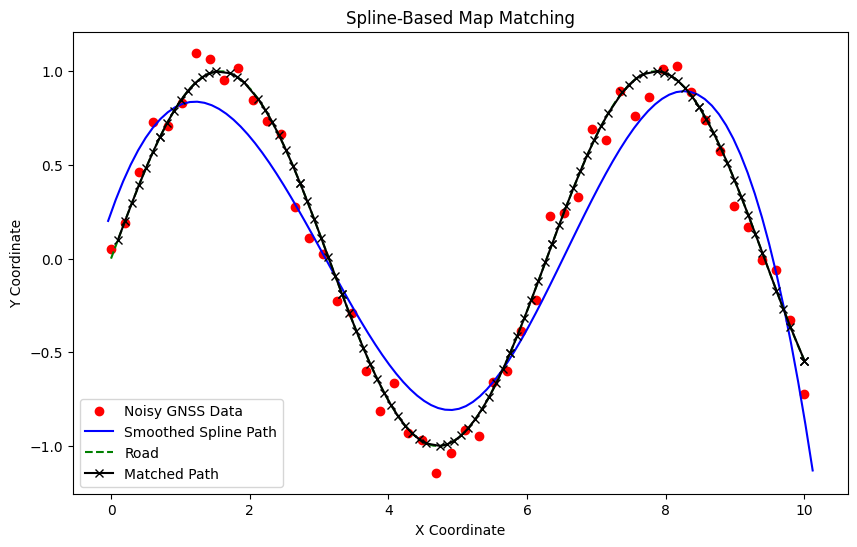

In [2]:
import numpy as np
from scipy.interpolate import splprep, splev
import matplotlib.pyplot as plt
from geopy.distance import geodesic

# Simulate some noisy GNSS data
np.random.seed(42)
n_points = 50
x = np.linspace(0, 10, n_points)
y = np.sin(x) + np.random.normal(scale=0.1, size=n_points)  # Simulated road (sine wave)

# Fit spline to noisy GNSS data
tck, u = splprep([x, y], s=2)  # `s` is a smoothing factor
u_fine = np.linspace(0, 1, 100)
x_smooth, y_smooth = splev(u_fine, tck)

# Simulated road network (a straight road)
road_x = np.linspace(0, 10, 100)
road_y = np.sin(road_x)

# Function to calculate the closest point on the road
def closest_point(x, y, road_x, road_y):
    min_dist = float('inf')
    min_index = 0
    for i in range(len(road_x)):
        dist = geodesic((y, x), (road_y[i], road_x[i])).meters
        if dist < min_dist:
            min_dist = dist
            min_index = i
    return road_x[min_index], road_y[min_index]

# Map-matching the smoothed path to the road
matched_x = []
matched_y = []
for x_p, y_p in zip(x_smooth, y_smooth):
    closest_x, closest_y = closest_point(x_p, y_p, road_x, road_y)
    matched_x.append(closest_x)
    matched_y.append(closest_y)

matched_x = np.array(matched_x)
matched_y = np.array(matched_y)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='Noisy GNSS Data')
plt.plot(x_smooth, y_smooth, 'b-', label='Smoothed Spline Path')
plt.plot(road_x, road_y, 'g--', label='Road')
plt.plot(matched_x, matched_y, 'kx-', label='Matched Path')
plt.legend()
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Spline-Based Map Matching')
plt.show()